<a href="https://colab.research.google.com/github/saxena-693/ML_Mini_Projects/blob/main/01_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
import os
import shutil

# Make .kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to that folder
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set proper permissions
os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques -f train.csv

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 643MB/s]


In [ ]:
#Task_01 - House Price Prediction using Linear Regression

#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Load the Dataset
df = pd.read_csv('train.csv')
print("Dataset Loaded Successfully")
df.head()

Dataset Loaded Successfully


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Select Relevant Features
data = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]
data.dropna(inplace=True)  #remove missing rows

# Preview the dataset
data.describe()

/tmp/ipython-input-7-3955776862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  #remove missing rows


,GrLivArea,BedroomAbvGr,FullBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,1.565068,180921.195890
std,525.480383,0.815778,0.550916,79442.502883
min,334.000000,0.000000,0.000000,34900.000000
25%,1129.500000,2.000000,1.000000,129975.000000
50%,1464.000000,3.000000,2.000000,163000.000000
75%,1776.750000,3.000000,2.000000,214000.000000
max,5642.000000,8.000000,3.000000,755000.000000


In [ ]:
#Train-Test Split
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

#Coefficients & Intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Model Intercept: 52261.74862694461


In [ ]:
#Make Predictions & Evaluate
y_pred = model.predict(X_test)

#Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.6341189942328371
Mean Squared Error: 2806426667.247853


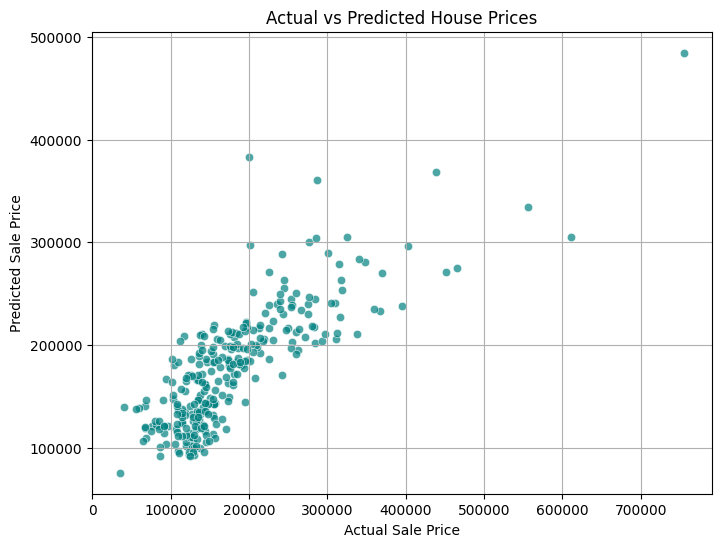

In [ ]:
#Visualize Predictions vs Actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()